<a href="https://www.kaggle.com/code/mikedelong/python-load-and-clean?scriptVersionId=140695061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/car-crashes/Motor_Vehicle_Collisions_-_Crashes.csv', index_col=['COLLISION_ID'],
                 low_memory=False,)
# consolidate the date and time into a datetime and drop the source columns
df['crash_datetime'] = pd.to_datetime(df['CRASH DATE'] + ' ' + df['CRASH TIME'])
df = df.drop(columns=['CRASH DATE', 'CRASH TIME'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018963 entries, 4455765 to 4647913
Data columns (total 27 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   BOROUGH                        object        
 1   ZIP CODE                       object        
 2   LATITUDE                       float64       
 3   LONGITUDE                      float64       
 4   LOCATION                       object        
 5   ON STREET NAME                 object        
 6   CROSS STREET NAME              object        
 7   OFF STREET NAME                object        
 8   NUMBER OF PERSONS INJURED      float64       
 9   NUMBER OF PERSONS KILLED       float64       
 10  NUMBER OF PEDESTRIANS INJURED  int64         
 11  NUMBER OF PEDESTRIANS KILLED   int64         
 12  NUMBER OF CYCLIST INJURED      int64         
 13  NUMBER OF CYCLIST KILLED       int64         
 14  NUMBER OF MOTORIST INJURED     int64         
 15  NUMBER OF

In [2]:
df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_datetime
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
4455765,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,...,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN,2021-09-11 02:39:00
4513547,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2022-03-26 11:45:00
4541903,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,...,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29 06:55:00
4456314,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0.0,...,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN,2021-09-11 09:35:00
4486609,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-14 08:13:00


How many duplicate rows do we have?

In [3]:
len(df) - len(df.drop_duplicates(ignore_index=True))

1710

In [4]:
df = df.drop_duplicates(ignore_index=True)

In [5]:
df.nunique()

BOROUGH                                5
ZIP CODE                             234
LATITUDE                          125761
LONGITUDE                          97836
LOCATION                          274163
ON STREET NAME                     17995
CROSS STREET NAME                  20044
OFF STREET NAME                   215493
NUMBER OF PERSONS INJURED             31
NUMBER OF PERSONS KILLED               7
NUMBER OF PEDESTRIANS INJURED         14
NUMBER OF PEDESTRIANS KILLED           4
NUMBER OF CYCLIST INJURED              5
NUMBER OF CYCLIST KILLED               3
NUMBER OF MOTORIST INJURED            30
NUMBER OF MOTORIST KILLED              6
CONTRIBUTING FACTOR VEHICLE 1         61
CONTRIBUTING FACTOR VEHICLE 2         61
CONTRIBUTING FACTOR VEHICLE 3         51
CONTRIBUTING FACTOR VEHICLE 4         41
CONTRIBUTING FACTOR VEHICLE 5         30
VEHICLE TYPE CODE 1                 1562
VEHICLE TYPE CODE 2                 1740
VEHICLE TYPE CODE 3                  246
VEHICLE TYPE COD

In [6]:
df.isna().sum()

BOROUGH                           627355
ZIP CODE                          627593
LATITUDE                          229393
LONGITUDE                         229393
LOCATION                          229393
ON STREET NAME                    424544
CROSS STREET NAME                 755135
OFF STREET NAME                  1684825
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6343
CONTRIBUTING FACTOR VEHICLE 2     307662
CONTRIBUTING FACTOR VEHICLE 3    1874152
CONTRIBUTING FACTOR VEHICLE 4    1985131
CONTRIBUTING FACTOR VEHICLE 5    2008581
VEHICLE TYPE CODE 1                12666
VEHICLE TYPE CODE 2               376774
VEHICLE TYPE CODE 3              1879142
VEHICLE TYPE COD

<Axes: >

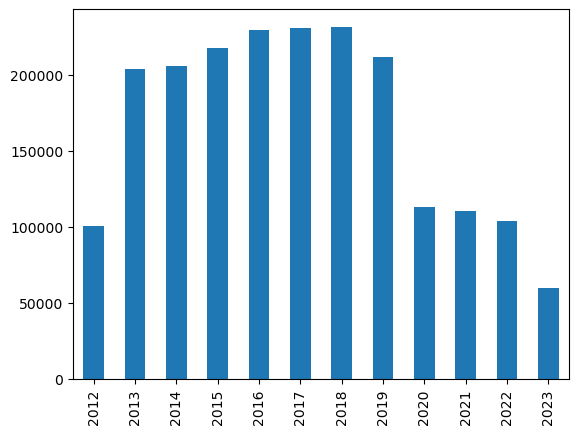

In [7]:
# let's look at the year buckets; do they look at all sensible?
df['crash_datetime'].dt.year.value_counts(sort=False).sort_index().plot(kind='bar')

It's plausible that we have a partial year for 2012 and 2023, and COVID cut the COVID year buckets almost in half.

<Axes: >

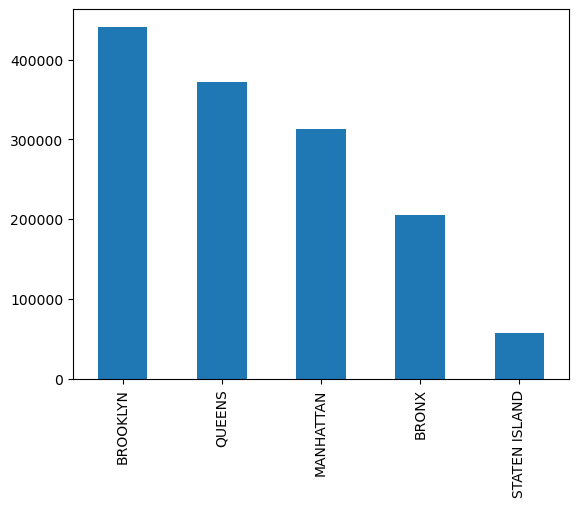

In [8]:
df['BOROUGH'].value_counts(sort=True).plot(kind='bar')